In [86]:
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
#Load the data
#dataframe.shape return number rows and cols in form of tuple
#dataframe.head() return first five rows of dataframe
df=pd.read_csv('Bengaluru_House_Data.csv')
# df.shape
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


EDA-(Exploratory Data Analysis)

In [ ]:
#df.info() returns a concise summary of a DataFrame, including the number of non-null entries and data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [50]:
#unwanted columns removal
#unwanted colums are area_type,availability,society,status
df=df.drop(['area_type','availability','society','balcony'],axis=1)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


Handling all NAN values

In [ ]:
# checking for null values
#isnull() function returns a DataFrame of same shape as df with boolean values indicating presence of null values.
#sum() function is then used to count these NaN values for each column.
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#Handling missing vlaues in the location field
df['location'].value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [ ]:
#filling  the NAN values in location with most frequent values in location column i.e Sarjapur  Road or Whitefield
df['location']=df['location'].fillna('Sarjapur  Road')
df['location'].value_counts()

location
Whitefield                 540
Sarjapur  Road             400
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [57]:
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#handling null values in size column by filling with most frequent value i,e 2 BHK
df['size'].value_counts()
df['size']=df['size'].fillna('2 BHK')

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [60]:
#handling null values in the bath column by filling with med of the column
med=df['bath'].median()
df['bath']=df['bath'].fillna(med)

In [ ]:
df.isnull().sum()
# Handled all the Nan values required  for the analysis

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [62]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
#drop duplicates in the Data frame
#drop_duplicates() function removes duplicate rows from the DataFrame.
#inplace=True parameter ensures that the changes are made directly to the original DataFrame without needing to reassign it.
df.drop_duplicates(inplace=True)

(12438, 5)

In [67]:
#Handling location column by replacing location with count<=10 with  'others'
loc_count=df['location'].value_counts()
loc_count_10=loc_count[loc_count<=10]
df['location']=df['location'].apply(lambda x: 'others' if x in loc_count_10 else x)
df['location'].value_counts()

location
others                  2941
Whitefield               507
Sarjapur  Road           365
Electronic City          273
Thanisandra              224
                        ... 
Tindlu                    11
Banashankari Stage V      11
Doddakallasandra          11
Thyagaraja Nagar          11
HAL 2nd Stage             11
Name: count, Length: 232, dtype: int64

In [69]:
# Handling Size column by removing the BHK from the values and storing only the numerical values
df['size']=df['size'].apply(lambda x:int(x[0]))
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [73]:
# Handling total_sqft column by converting the range  values to single values by taking average of the range
df['total_sqft'].unique()
def clean_sqft(x):
    l=str(x).split('-')
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2 #avg of the range
    try:
        return float(l[0])
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(clean_sqft)
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [77]:
#handling total_sqft null values by filling with mean of the column
mean=round(df['total_sqft'].mean())
df['total_sqft']=df['total_sqft'].fillna(mean)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [82]:
#converting the bath column to integer type
#astype() function is used to cast a pandas object to a specified data type.
df['bath']=df['bath'].astype(int)
df['bath']

0        2
1        5
2        2
3        3
4        2
        ..
13314    3
13315    4
13316    5
13317    2
13318    4
Name: bath, Length: 12438, dtype: int64

In [83]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
1,Chikka Tirupathi,4,2600.0,5,120.00
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00


Handling Outliers

In [88]:
# creating a new column price_per_sqft `to find the price per square feet of each house and search outliers`
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615
2,Uttarahalli,3,1440.0,2,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3,95.00,6245.890861
4,Kothanur,2,1200.0,2,51.00,4250.000000


In [89]:
#handling outliers in the price_per_sqft column by removing unrealistic values
#Real time a house should contain a minimum of 300 sqft area per bedroom
#formula:  total_sqft/bhk >=300 --> to remove all unrealistic values
df=df[df['price_per_sqft']/df['size']>=300]


<Axes: xlabel='size'>

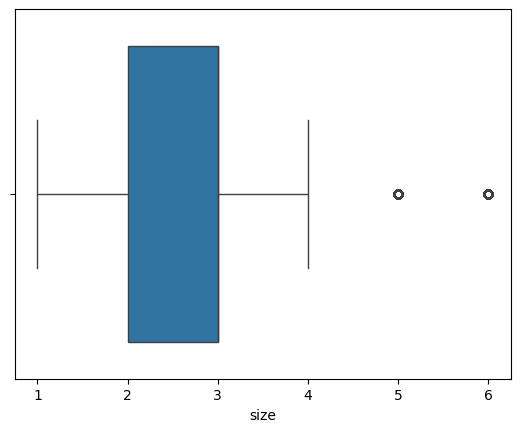

In [91]:
df=df[df['size']<=6]
sns.boxplot(x=df['size'])

In [ ]:
#handling outliers in bath column by removing unrealistic values
# 2bhk --> 2+2
#3bhk -->3+2
df=df[df['bath']<df['size']+2]
df

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615
2,Uttarahalli,3,1440.0,2,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3,95.00,6245.890861
4,Kothanur,2,1200.0,2,51.00,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3,112.00,6530.612245
13315,Whitefield,5,3453.0,4,231.00,6689.834926
13316,others,4,3600.0,5,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2,60.00,5258.545136


<Axes: xlabel='price_per_sqft'>

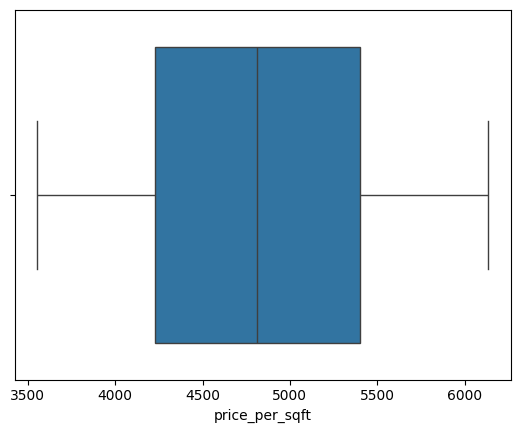

In [107]:
#removing ouliers in price_per_sqft
#using the IQR method-->INTER QUARTILE RANGE
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-0.5*IQR
upper=Q3+0.5*IQR
df=df[(df['price_per_sqft']>=lower)& (df['price_per_sqft']<=upper)]
sns.boxplot(x=df['price_per_sqft'])


In [108]:
df.reset_index(inplace=True)
df

,index,location,size,total_sqft,bath,price,price_per_sqft
0,0,Electronic City Phase II,2,1056.0,2,39.07,3699.810606
1,1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615
2,2,Uttarahalli,3,1440.0,2,62.00,4305.555556
3,4,Kothanur,2,1200.0,2,51.00,4250.000000
4,8,Marathahalli,3,1310.0,3,63.25,4828.244275
...,...,...,...,...,...,...,...
6118,13302,others,2,1075.0,2,48.00,4465.116279
6119,13309,Yeshwanthpur,3,1675.0,3,92.13,5500.298507
6120,13310,Rachenahalli,2,1050.0,2,52.71,5020.000000
6121,13312,Bellandur,2,1262.0,2,47.00,3724.247227


In [128]:
# drop the price_per_sqft col and index column
df=df.drop(['price_per_sqft','index'],axis=1)

KeyError: "['price_per_sqft', 'index'] not found in axis"

In [129]:
#importing models to train the data
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error

In [130]:
encoder=LabelEncoder()
df['enc_loc']=encoder.fit_transform(df['location'])
df

,location,size,total_sqft,bath,price,enc_loc
0,Electronic City Phase II,2,1056.0,2,39.07,71
1,Chikka Tirupathi,4,2600.0,5,120.00,54
2,Uttarahalli,3,1440.0,2,62.00,205
3,Kothanur,2,1200.0,2,51.00,139
4,Marathahalli,3,1310.0,3,63.25,153
...,...,...,...,...,...,...
6118,others,2,1075.0,2,48.00,219
6119,Yeshwanthpur,3,1675.0,3,92.13,218
6120,Rachenahalli,2,1050.0,2,52.71,175
6121,Bellandur,2,1262.0,2,47.00,41


In [131]:
#divide data into input and output
X=df.drop(['price','location'],axis=1)
Y=df['price']

In [132]:
#spliting data into training and testing data
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [133]:
model=RandomForestRegressor()
params={
    'n_estimators':[100,150,200,250],
    'max_depth':[3,4,5,6]
}
grid=GridSearchCV(model,param_grid=params,cv=5)
grid.fit(Xtrain,Ytrain)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [134]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'max_depth': 6, 'n_estimators': 150}


In [135]:
print('Training Efficiency:',grid.score(Xtrain,Ytrain))
print("Testing Efficiency:",grid.score(Xtest,Ytest))

Training Efficiency: 0.9261862725714789
Testing Efficiency: 0.9152457481944416


In [136]:
#save the cleaned  model
import pickle
with  open('RFmodelHPP.pkl','wb') as f:
    pickle.dump(grid,f)

In [137]:
Xtrain

,size,total_sqft,bath,enc_loc
2431,3,1390.0,2,205
5022,2,1285.0,2,139
3443,2,907.0,2,164
134,2,1108.0,2,70
3626,2,1495.0,2,123
...,...,...,...,...
3772,2,1000.0,2,219
5191,2,1200.0,2,41
5226,3,1401.0,3,120
5390,2,1275.0,2,219


In [138]:
#save the cleaned data to a new csv file
df.to_csv('cleaned_house_data.csv',index=False)
